In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import corner
from astropy.io import fits
from astropy.table import Table, vstack
from ParamVAEapply import ParamVAEapply
from BandPassVAE import BandPassVAE
from SpectraVAE import SpectraVAE
from ParamVAE import ParamVAE
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from datetime import datetime
import numpy.ma as ma
import tensorflow as tf
import keras
from keras import ops
from keras import layers
from utils import Sampling


def load_paramvaeapply(path: str, weight_file: str, input_dim: int, latent_dim: int, beta: float) -> ParamVAEapply:
    """
    Loads weights and builds a ParamVAEapply model from a saved epoch weight file.

    Parameters:
        weight_file (str): Path to the weights file (.h5).
        input_dim (int): Dimensionality of the input data.
        latent_dim (int): Latent space dimensionality.
        beta (float): Beta value for VAE loss.

    Returns:
        ParamVAEapply: A ready-to-use model with loaded weights.
    """
    # Build required submodels
    
    spvae_wf = os.path.join(os.path.join(path, 'SpectraVAE'), weight_file)
    bpvae_wf = os.path.join(os.path.join(path, 'BandPassVAE'), weight_file)
    parvae_wf = os.path.join(os.path.join(path, 'ParamVAE'), weight_file)
    print(spvae_wf, bpvae_wf, parvae_wf)
    spvae = SpectraVAE(100, latent_dim, beta=beta)
    spvae.compile() #optimizer=keras.optimizers.Adam())
    spvae(tf.zeros((1, 100)))  # Force model building
    spvae.load_weights(spvae_wf)

    bpvae = BandPassVAE(input_dim, latent_dim, spvae, beta=beta)
    bpvae.compile()#optimizer=keras.optimizers.Adam())
    bpvae(tf.zeros((1, input_dim)))  # Force model building
    bpvae.load_weights(bpvae_wf)

    # Attach ParamVAE
    parvae = ParamVAE(100, latent_dim, spvae, beta=beta, n_param=4)
    parvae.compile()#optimizer=keras.optimizers.Adam())
    parvae(tf.zeros((1, 100)))  # Force model building
    parvae.load_weights(parvae_wf)

    return ParamVAEapply(input_dim, latent_dim, bpvae, parvae, beta=beta), parvae, bpvae, spvae


latent_dim = 64
beta = 1e-3
epoch = 1
n_param = 4
input_dim = 5

chunk_size = 100_000      # user-defined chunk size
n_smpl = 10               # number of model samples per chunk

id_run = '20251010162214'
weight_path = "/data/kirg/MMVAE/cigale/" + id_run + "/"
save_path = os.path.join(weight_path, 'epochs/')
plot_output_path = os.path.join(weight_path, 'cornerplots_train_' + id_run)


tr_smpl = os.path.join(weight_path, 'train_dataset_cigale_tmpl.fits')

2025-11-17 15:23:00.346960: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-17 15:23:00.354443: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763389380.363091   39009 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763389380.365663   39009 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763389380.372247   39009 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

weights_epoch_01.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_01.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_01.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_01.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_17784']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_17800']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_17800']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_02.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_02.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_02.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_02.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_17822']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_17838']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_17838']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_03.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_03.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_03.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_03.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_17860']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_17876']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_17876']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_04.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_04.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_04.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_04.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_17898']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_17914']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_17914']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_05.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_05.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_05.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_05.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_17936']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_17952']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_17952']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_17974']
Received: inputs

weights_epoch_06.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_06.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_06.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_06.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_17990']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18012']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18028']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_07.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_07.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_07.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_07.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18028']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18050']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18066']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_08.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_08.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_08.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_08.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18066']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18088']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18104']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_09.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_09.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_09.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_09.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18104']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18126']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18142']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_10.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_10.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_10.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_10.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18142']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18164']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18180']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_11.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_11.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_11.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_11.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18180']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18202']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18218']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_12.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_12.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_12.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_12.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18218']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18240']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18256']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_13.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_13.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_13.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_13.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18256']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18278']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18294']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_14.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_14.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_14.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_14.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18294']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18316']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18332']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_15.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_15.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_15.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_15.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18332']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18354']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18370']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_16.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_16.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_16.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_16.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18370']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18392']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18408']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_17.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_17.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_17.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_17.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18408']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18430']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18446']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_18.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_18.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_18.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_18.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18446']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18468']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18484']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_19.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_19.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_19.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_19.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18484']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18506']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18522']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_20.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_20.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_20.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_20.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18522']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18544']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18560']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_21.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_21.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_21.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_21.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18560']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18582']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18598']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_22.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_22.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_22.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_22.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18598']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18620']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18636']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_23.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_23.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_23.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_23.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18636']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18658']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18674']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_24.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_24.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_24.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_24.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18674']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18696']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18712']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_25.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_25.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_25.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_25.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18712']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18734']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18750']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_26.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_26.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_26.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_26.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18750']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18772']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)


weights_epoch_27.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_27.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_27.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_27.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18788']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18788']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18810']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)


weights_epoch_28.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_28.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_28.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_28.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18826']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18826']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18848']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)


weights_epoch_29.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_29.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_29.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_29.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18864']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18864']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18886']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)


weights_epoch_30.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_30.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_30.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_30.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18902']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18902']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18924']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)


weights_epoch_31.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_31.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_31.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_31.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18940']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18940']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18962']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)


weights_epoch_32.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_32.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_32.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_32.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18978']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18978']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19000']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)


weights_epoch_33.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_33.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_33.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_33.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19016']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19016']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19038']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)


weights_epoch_34.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_34.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_34.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_34.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19054']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19054']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19076']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)


weights_epoch_35.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_35.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_35.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_35.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19092']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19092']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19114']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)


weights_epoch_36.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_36.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_36.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_36.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19130']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19130']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19152']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)


weights_epoch_37.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_37.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_37.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_37.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19168']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19168']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_38.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_38.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_38.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_38.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19190']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19206']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19206']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19228']
Received: inputs

weights_epoch_39.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_39.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_39.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_39.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19244']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19266']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19282']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_40.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_40.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_40.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_40.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19282']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19304']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19320']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_41.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_41.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_41.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_41.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19320']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19342']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19358']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_42.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_42.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_42.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_42.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19358']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19380']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19396']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_43.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_43.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_43.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_43.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19396']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19418']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19434']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_44.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_44.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_44.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_44.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19434']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19456']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19472']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_45.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_45.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_45.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_45.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19472']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19494']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19510']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_46.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_46.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_46.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_46.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19510']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19532']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19548']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_47.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_47.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_47.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_47.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19548']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19570']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19586']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_48.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_48.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_48.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_48.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19586']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19608']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19624']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_49.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_49.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_49.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_49.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19624']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19646']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19662']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_50.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_50.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_50.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_50.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19662']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19684']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19700']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_51.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_51.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_51.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_51.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19700']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19722']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19738']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_52.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_52.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_52.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_52.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19738']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19760']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19776']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_53.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_53.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_53.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_53.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19776']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19798']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19814']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_54.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_54.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_54.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_54.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19814']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19836']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19852']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_55.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_55.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_55.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_55.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19852']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19874']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19890']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_56.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_56.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_56.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_56.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19890']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19912']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19928']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_57.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_57.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_57.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_57.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19928']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19950']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19966']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_58.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_58.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_58.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_58.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19966']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19988']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20004']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_59.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_59.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_59.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_59.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20004']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20026']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20042']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_60.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_60.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_60.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_60.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20042']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20064']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20080']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_61.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_61.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_61.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_61.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20080']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20102']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20118']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_62.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_62.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_62.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_62.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20118']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20140']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20156']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_63.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_63.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_63.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_63.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20156']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20178']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20194']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_64.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_64.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_64.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_64.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20194']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20216']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20232']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_65.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_65.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_65.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_65.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20232']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20254']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20270']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_66.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_66.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_66.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_66.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20270']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20292']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20308']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_67.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_67.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_67.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_67.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20308']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20330']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20346']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_68.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_68.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_68.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_68.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20346']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20368']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20384']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_69.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_69.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_69.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_69.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20384']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_70.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_70.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_70.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_70.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20406']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20422']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20422']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_71.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_71.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_71.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_71.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20444']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20460']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20460']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_72.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_72.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_72.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_72.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20482']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20498']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20498']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_73.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_73.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_73.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_73.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20520']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20536']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20536']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_74.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_74.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_74.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_74.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20558']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20574']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20574']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_75.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_75.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_75.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_75.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20596']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20612']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20612']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_76.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_76.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_76.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_76.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20634']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20650']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20650']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_77.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_77.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_77.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_77.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20672']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20688']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20688']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_78.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_78.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_78.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_78.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20710']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20726']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20726']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_79.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_79.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_79.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_79.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20748']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20764']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20764']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_80.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_80.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_80.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_80.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20786']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20802']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20802']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_81.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_81.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_81.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_81.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20824']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20840']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20840']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_82.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_82.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_82.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_82.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20862']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20878']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20878']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_83.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_83.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_83.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_83.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20900']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20916']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20916']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_84.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_84.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_84.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_84.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20938']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20954']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20954']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_85.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_85.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_85.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_85.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20976']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20992']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20992']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_86.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_86.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_86.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_86.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21014']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21030']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21030']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_87.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_87.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_87.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_87.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21052']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21068']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21068']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_88.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_88.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_88.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_88.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21090']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21106']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21106']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_89.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_89.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_89.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_89.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21128']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21144']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21144']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_90.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_90.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_90.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_90.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21166']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21182']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21182']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_91.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_91.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_91.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_91.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21204']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21220']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21220']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21242']
Received: inputs

weights_epoch_92.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_92.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_92.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_92.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21258']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21280']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21296']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_93.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_93.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_93.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_93.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21296']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21318']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21334']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_94.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_94.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_94.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_94.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21334']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21356']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21372']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_95.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_95.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_95.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_95.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21372']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21394']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21410']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_96.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_96.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_96.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_96.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21410']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21432']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21448']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_97.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_97.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_97.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_97.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21448']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21470']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21486']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_98.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_98.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_98.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_98.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21486']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21508']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21524']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_99.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_99.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_99.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_99.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21524']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21546']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21562']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_100.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_100.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_100.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_100.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21562']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21584']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21600']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_101.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_101.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_101.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_101.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21600']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21622']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21638']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_102.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_102.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_102.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_102.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21638']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21660']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21676']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_103.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_103.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_103.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_103.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21676']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21698']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21714']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_104.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_104.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_104.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_104.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21714']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21736']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21752']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_105.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_105.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_105.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_105.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21752']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21774']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21790']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_106.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_106.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_106.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_106.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21790']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21812']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21828']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_107.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_107.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_107.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_107.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21828']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21850']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21866']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_108.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_108.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_108.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_108.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21866']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21888']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21904']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_109.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_109.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_109.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_109.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21904']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21926']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21942']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_110.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_110.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_110.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_110.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21942']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21964']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21980']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_111.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_111.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_111.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_111.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21980']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22002']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22018']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_112.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_112.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_112.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_112.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22018']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_113.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_113.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_113.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_113.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22040']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22056']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22056']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_114.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_114.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_114.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_114.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22078']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22094']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22094']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_115.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_115.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_115.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_115.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22116']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22132']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22132']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_116.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_116.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_116.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_116.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22154']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22170']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22170']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_117.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_117.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_117.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_117.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22192']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22208']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22208']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_118.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_118.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_118.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_118.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22230']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22246']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22246']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_119.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_119.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_119.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_119.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22268']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22284']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22284']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_120.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_120.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_120.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_120.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22306']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22322']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22322']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_121.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_121.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_121.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_121.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22344']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22360']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22360']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_122.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_122.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_122.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_122.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22382']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22398']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22398']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_123.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_123.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_123.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_123.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22420']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22436']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22436']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_124.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_124.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_124.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_124.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22458']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22474']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22474']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_125.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_125.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_125.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_125.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22496']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22512']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22512']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_126.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_126.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_126.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_126.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22534']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22550']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22550']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_127.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_127.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_127.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_127.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22572']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22588']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22588']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_128.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_128.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_128.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_128.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22610']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22626']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22626']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_129.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_129.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_129.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_129.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22648']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22664']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22664']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_130.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_130.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_130.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_130.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22686']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22702']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22702']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_131.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_131.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_131.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_131.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22724']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22740']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22740']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_132.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_132.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_132.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_132.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22762']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22778']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22778']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_133.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_133.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_133.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_133.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22800']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22816']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22816']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


weights_epoch_134.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_134.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_134.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_134.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22838']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22854']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22854']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22876']
Received: inputs

weights_epoch_135.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_135.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_135.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_135.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22892']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22914']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22930']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_136.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_136.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_136.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_136.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22930']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22952']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22968']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_137.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_137.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_137.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_137.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22968']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22990']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23006']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_138.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_138.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_138.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_138.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23006']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23028']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23044']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_139.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_139.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_139.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_139.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23044']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23066']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23082']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_140.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_140.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_140.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_140.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23082']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23104']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23120']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_141.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_141.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_141.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_141.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23120']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23142']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23158']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_142.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_142.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_142.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_142.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23158']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23180']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23196']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_143.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_143.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_143.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_143.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23196']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23218']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23234']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_144.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_144.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_144.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_144.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23234']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23256']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23272']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_145.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_145.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_145.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_145.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23272']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23294']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23310']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_146.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_146.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_146.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_146.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23310']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23332']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23348']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_147.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_147.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_147.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_147.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23348']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23370']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23386']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_148.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_148.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_148.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_148.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23386']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23408']
Received: inputs=Tensor(shape=(1, 100))
  warnings.warn(msg)
/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23424']
Received: inputs=Tensor(shape=(1, 5))
  warnings.warn(msg)


weights_epoch_149.weights.h5
/data/kirg/MMVAE/cigale/20251010162214/epochs/SpectraVAE/weights_epoch_149.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/BandPassVAE/weights_epoch_149.weights.h5 /data/kirg/MMVAE/cigale/20251010162214/epochs/ParamVAE/weights_epoch_149.weights.h5


/home/kirg/envs/envp3.12/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23424']
Received: inputs=Tensor(shape=(100000, 5))
  warnings.warn(msg)


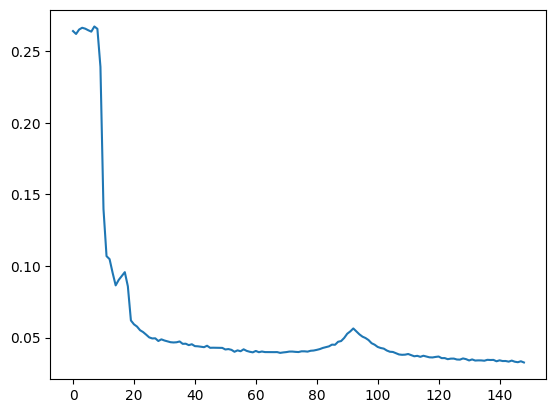

In [10]:
import matplotlib.pyplot as plt

t = Table.read(tr_smpl)

inp_spec = t['Spec']
inp_sed = t['SED']
inp_par = t['Param']


epochs = np.arange(1, 150)

loss_vals = []

for epoch in epochs:
    weight_file = f"weights_epoch_{epoch:02d}.weights.h5"
    print(weight_file)
    parvaeapply, parvae, bpvae, spvae = load_paramvaeapply(
        save_path, weight_file, input_dim, latent_dim, beta
    )
    spec_applied = bpvae(inp_sed)
    loss = tf.keras.backend.mean(tf.keras.backend.square(spec_applied - inp_spec))
    loss_vals.append(loss)



plt.plot(loss_vals)
plt.show()

